In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import bernoulli

In [2]:
def play_game_p1(p, k, N):
    p1 = k
    m = 0
    while (p1 > 0 and p1 < N):
        winner = bernoulli.rvs(p)
        m += 1
        if winner == 1:
            p1 += 1
        elif winner == 0:
            p1 -= 1
        else:
            raise ValueError
        
    if p1 == 0:
        return True, m
    else:
        return False, m
    
def multiple_games(ngames, p, k, N):
    # Returns the percentaje of games won by P1.
    wins = 0
    mk = 0
    for _ in range(ngames):
        w, m = play_game_p1(p, k, N)
        wins += w
        mk += m
    return wins/ ngames, mk/ ngames

In [3]:
N = 50
k = 40
p = .5
q = 1-p
ngames = 1000

In [5]:
data_allp = pd.DataFrame([])
x_vector = range(1, 50)
for p in [.2, .4, .45, .5, .55 ,.6, .9]:
    uk_vector = []
    mk_vector = []
    for k in x_vector:
        uk, mk = multiple_games(ngames, p, k, N)
        uk_vector.append(uk)
        mk_vector.append(mk)
    data = {'x': x_vector, 'uk': uk_vector, 'mk': mk_vector,'p': np.repeat(str(p), len(x_vector))}
    df_p = pd.DataFrame(data)
    data_allp = pd.concat([data_allp, df_p], ignore_index=True)

In [11]:
data_allp.to_csv('imgs/data.txt')

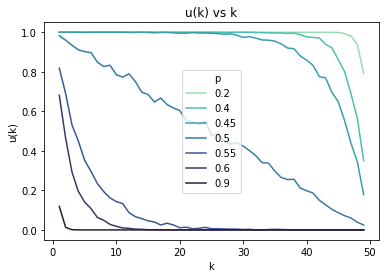

In [10]:
palette = sns.color_palette("mako_r", len(data_allp['p'].unique()))
sns.lineplot(x="x", y="uk", hue="p", data=data_allp,
            palette=palette)
plt.title('u(k) vs k')
plt.ylabel('u(k)')
plt.xlabel('k')

plt.savefig('./imgs/uk_vs_k.png')

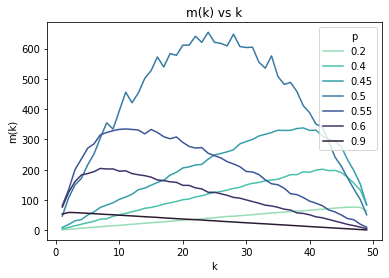

In [9]:
palette = sns.color_palette("mako_r", len(data_allp['p'].unique()))
sns.lineplot(x="x", y="mk", hue="p", data=data_allp,
            palette=palette)
plt.title('m(k) vs k')
plt.ylabel('m(k)')
plt.xlabel('k')

plt.savefig('./imgs/mk_vs_k.png')